In [10]:
print("Hello World")

Hello World


# Set Up

In [225]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data
## Download the Data


In [229]:
# Downloading the Data From the Web 
# Step 1: Imports
import os, urllib.request, tarfile
import pandas as pd

# Step 2: Paths
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Step 3: Download + extract function
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path, filter="data")
    housing_tgz.close()

# Step 4: Load function
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Step 5: Run both
fetch_housing_data()
housing = load_housing_data()
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [15]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


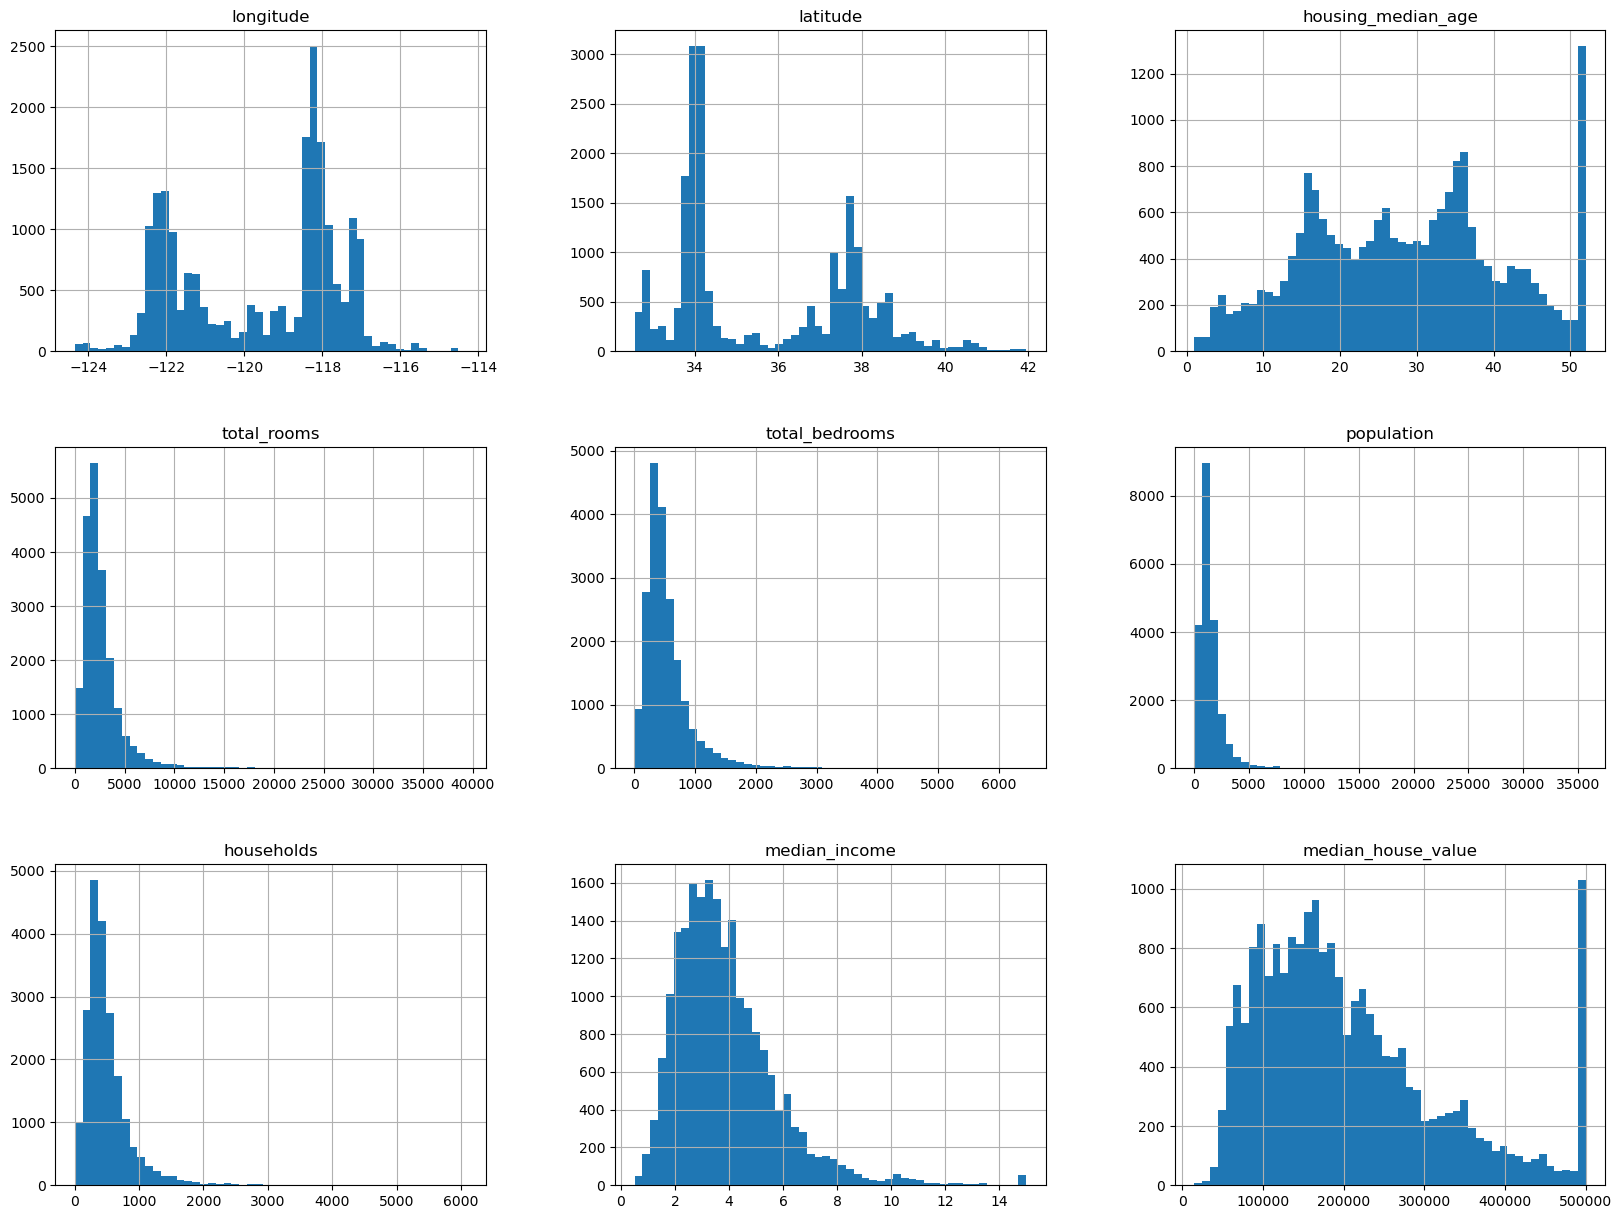

In [17]:
# This magic command is specific to Jupyter Notebooks.
# It ensures that all plots generated by matplotlib appear directly below the code cell.
%matplotlib inline

# Importing the pyplot module from matplotlib and giving it the alias 'plt'.
# This module provides a MATLAB-like interface for plotting.
import matplotlib.pyplot as plt

# Generating histograms for each numerical attribute in the 'housing' DataFrame.
# 'bins=50' specifies the number of intervals (bins) for each histogram,
# which helps in visualizing the distribution of each numerical feature in more detail.
# 'figsize=(20,15)' sets the overall width and height of the figure in inches,
# making the output larger and more readable.
housing.hist(bins=50, figsize=(20,15))

# Displaying the figure. This line is necessary in some environments
# to ensure the plot is rendered, especially when not using Jupyter.
plt.show()


# Create a Test Set

In [199]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [201]:
# Importing NumPy, a fundamental library for numerical computations in Python
import numpy as np

# Defining a function to split a dataset into a training set and a test set
def split_train_test(data, test_ratio):
    # Generate a random permutation of indices based on the length of the data.
    # This shuffles the dataset indices randomly.
    shuffled_indices = np.random.permutation(len(data))

    # Calculate the size of the test set based on the given test ratio
    test_set_size = int(len(data) * test_ratio)

    # Select the first part of the shuffled indices as test set indices
    test_indices = shuffled_indices[:test_set_size]

    # The remaining indices are used for the training set
    train_indices = shuffled_indices[test_set_size:]

    # Return the train and test sets by selecting rows using iloc (integer-location indexing)
    return data.iloc[train_indices], data.iloc[test_indices]


In [203]:
# Split the housing dataset into training and testing sets with 20% test data
train_set, test_set = split_train_test(housing, 0.2)

# Get the number of samples in the training set
len(train_set)


16512

In [23]:
len(test_set)

4128

In [205]:
from zlib import crc32
import numpy as np

# This function determines whether a data point should be in the test set
# based on a stable hash (crc32) of its identifier and the desired test ratio.
def test_set_check(identifier, test_ratio):
    # Convert the identifier to a 64-bit integer, hash it with crc32,
    # mask with 0xffffffff to get an unsigned 32-bit number,
    # then check if it falls below the threshold for test set inclusion.
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# This function splits the dataset into train and test sets based on stable hashing of IDs.
def split_train_test_by_id(data, test_ratio, id_column):
    # Extract the IDs from the specified column in the dataframe
    ids = data[id_column]
    
    # Apply the test_set_check function to each ID to determine if it's in the test set
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    
    # Return two subsets: data points NOT in test set (train) and those IN test set (test)
    return data.loc[~in_test_set], data.loc[in_test_set]


In [209]:
# Add a new column "index" to the housing DataFrame, which contains the original row indices
housing_with_id = housing.reset_index()

#  Use the custom split function to split the data into train and test sets
#  Pass housing_with_id as the dataset
#  0.2 means 20% of data will go to the test set
#  "index" specifies that the unique identifier column is the new "index" column we just created
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


In [211]:
# Step 1: Drop rows with missing longitude or latitude, since ID depends on these
housing_clean = housing.dropna(subset=["longitude", "latitude"]).copy()

# Step 2: Create a new "id" column as before
housing_clean["id"] = housing_clean["longitude"] * 1000 + housing_clean["latitude"]
# Step 5: Run the split
train_set, test_set = split_train_test_by_id(housing_clean, 0.2, "id")

# Custom Hash-Based Split based on Lat and Long 
# Key Advantage: It's deterministic. If you rerun the split tomorrow, you'll get the same train-test division as long as the data and ID remain unchanged.

In [34]:
from sklearn.model_selection import train_test_split

# Split the dataset 'housing' into training and testing sets
# test_size=0.2 means 20% of the data will be reserved for testing
# random_state=42 ensures the split is reproducible (same split every time you run it)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [36]:
# Create a new categorical column 'income_cat' in the housing DataFrame
# This column categorizes 'median_income' into 5 bins (income categories)
housing["income_cat"] = pd.cut(
    housing["median_income"],                    # Column to be binned
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],       # Define the edges of the bins
    labels=[1, 2, 3, 4, 5]                       # Assign labels to each bin/category
)


<Axes: >

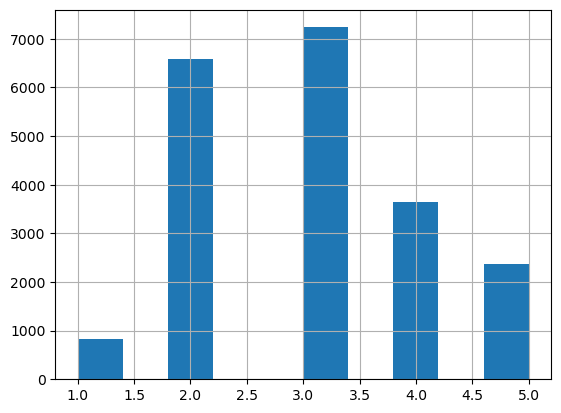

In [38]:
housing["income_cat"].hist()

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create a StratifiedShuffleSplit object that will split the dataset once (n_splits=1)
# It will keep 20% of the data as test set and 80% as training set (test_size=0.2)
# random_state=42 is for reproducibility of the split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Use the split object to generate indices for train/test splits
# stratify based on the "income_cat" column to maintain the income category distribution in both sets
for train_index, test_index in split.split(housing, housing["income_cat"]):
    # Create training set by selecting rows using train_index
    strat_train_set = housing.iloc[train_index]
    # Create test set by selecting rows using test_index
    strat_test_set = housing.iloc[test_index]


In [42]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)
# Calculate the proportion of each income category in the stratified test set


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [44]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1,errors='ignore')
# Remove the "income_cat" column from both training and test sets
# since it was only used for stratified sampling and is no longer needed
    

In [46]:
housing = strat_train_set.copy()

# Discover and Visualize the Data to Gain Insights


## Visualizing Geographical Data

<Axes: xlabel='longitude', ylabel='latitude'>

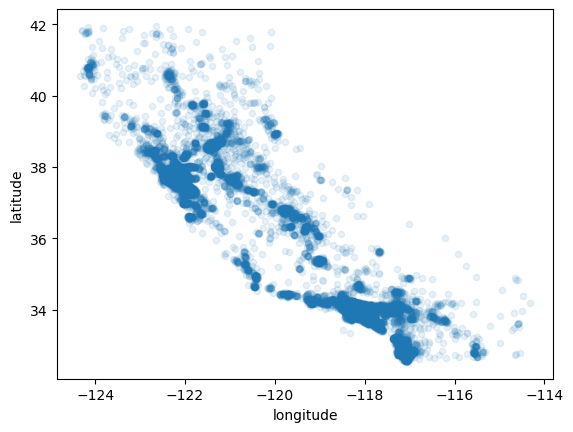

In [48]:
housing.plot(kind="scatter", x="longitude", y="latitude" ,alpha=0.1)

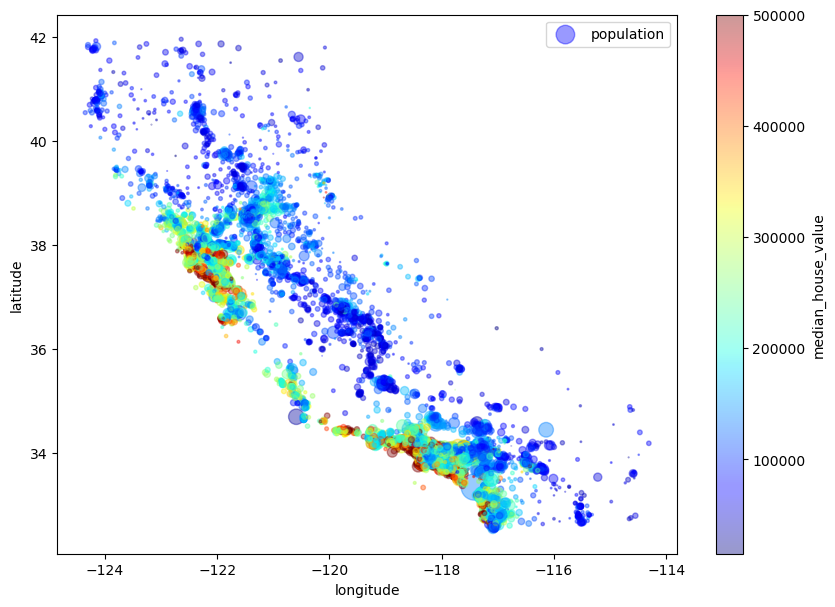

In [50]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
# Now let’s look at the housing prices. The radius of each circle represents the district’s population (option s), and the color represents the price (option c).
# We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

In [217]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x15cd2a000>)

Saving figure california_housing_prices_plot


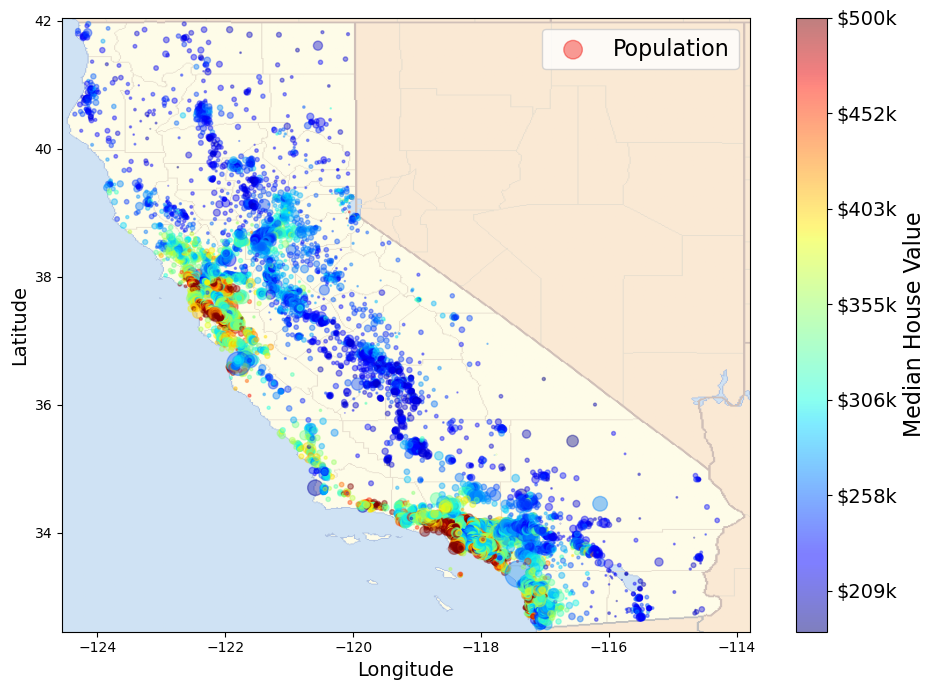

In [220]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## Looking for Correlations

In [51]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
#The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

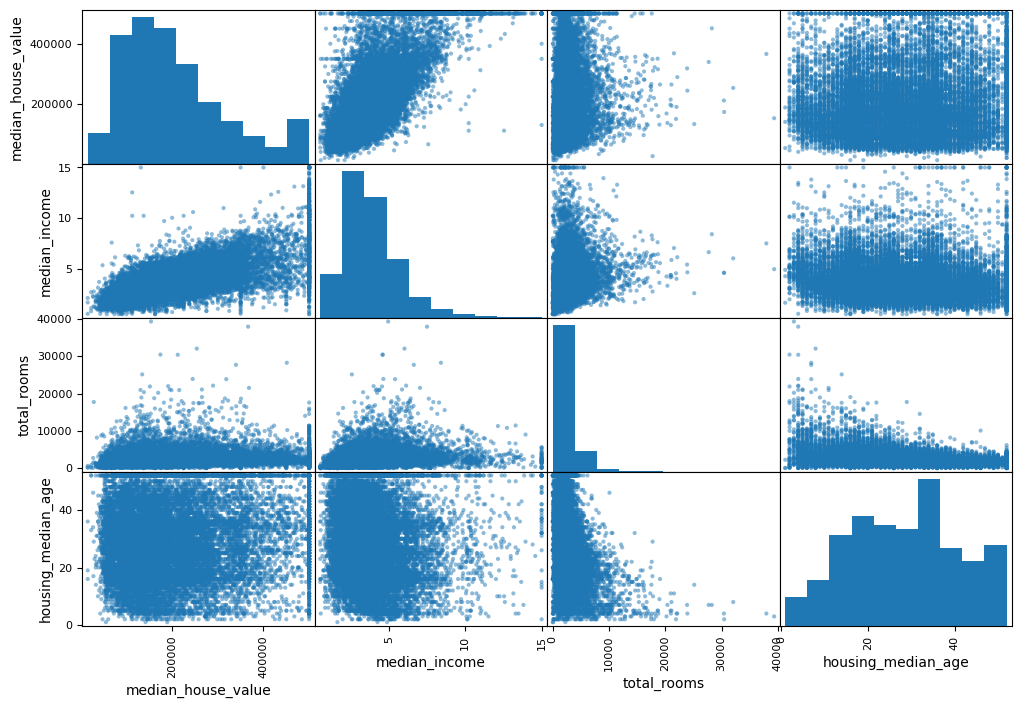

In [52]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function, which plots every numerical attribute against every 
# The main diagonal (top left to bottom right) would be full of straight lines if pandas plotted each variable against itself, which would not be very useful.
# So instead pandas displays a histogram of each attribute 

<Axes: xlabel='median_income', ylabel='median_house_value'>

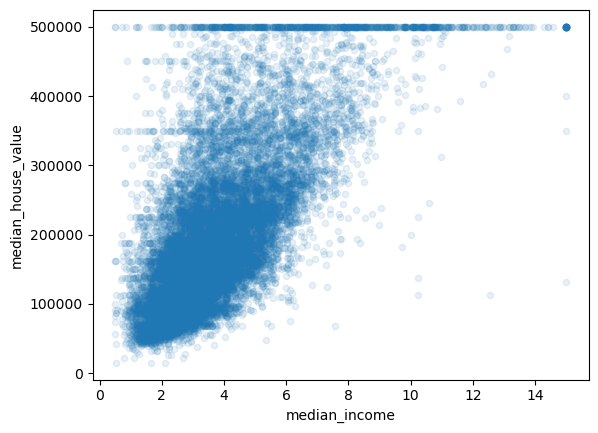

In [55]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

## Experimenting with Attribute Combinations

In [302]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

# One last thing you may want to do before preparing the data for Machine Learning algorithms is to try out various attribute combinations
# This round of exploration does not have to be absolutely thorough; 
# The point is to start off on the right foot and quickly gain insights that will help you get a first reasonably good prototype. 
# But this is an iterative process: once you get a prototype up and running
# You can analyze its output to gain more insights and come back to this exploration step.

In [304]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
# The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms.

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

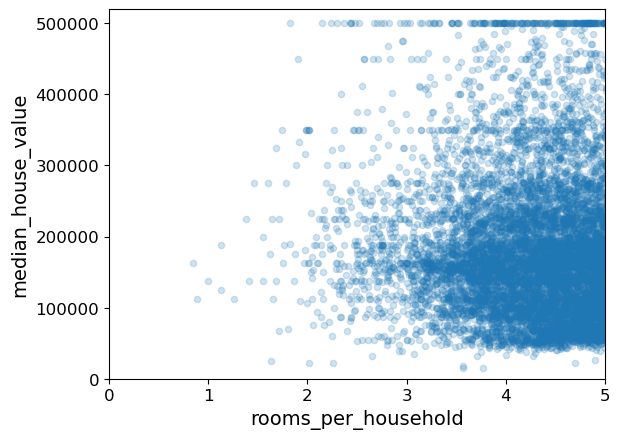

In [306]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [308]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


Prepare the Data for Machine Learning Algorithms

In [311]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
# But first let’s revert to a clean training set (by copying strat_train_set once again).
# Let’s also separate the predictors and the labels
# Since we don’t necessarily want to apply the same transformations to the predictors and the target values 
# Note that drop() creates a copy of the data and does not affect strat_train_set):

# Data Cleaning


### housing.dropna(subset=["total_bedrooms"])                   # option 1

### housing.drop("total_bedrooms", axis=1)                      # option 2

### median = housing["total_bedrooms"].median()                 # option 3
### housing["total_bedrooms"].fillna(median, inplace=True)


#### To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [318]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,5


In [320]:
sample_incomplete_rows.dropna(subset=["total_rooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,5


In [322]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN,5


In [324]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median) # option 3

1606     433.0
10915    433.0
19150    433.0
4186     433.0
16885    433.0
Name: total_bedrooms, dtype: float64

In [326]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,5


In [328]:
from sklearn.impute import SimpleImputer

# Create an imputer object that fills missing values using the median of each column
imputer = SimpleImputer(strategy="median")


In [330]:
# Create a new DataFrame with only the numerical columns by dropping the categorical 'ocean_proximity' column
housing_num = housing.drop("ocean_proximity", axis=1)


In [332]:
# Compute the median values of each numeric column to be used for imputing missing data
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [334]:
# Show the median values computed for each numeric column during fitting
imputer.statistics_


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [336]:
# Select only the numeric columns from the housing DataFrame and assign to housing_num
housing_num = housing.select_dtypes(include=[np.number])

# Calculate the median of each numeric column and get the values as a numpy array
housing_num.median().values


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [338]:
# Remove categorical columns before fitting the imputer to avoid mismatch
housing_num = housing.drop(["ocean_proximity", "income_cat"], axis=1)

# Fit the imputer on the numeric data to learn median values for each column
imputer.fit(housing_num)

# Transform the numeric data by replacing missing values with the learned medians
X = imputer.transform(housing_num)



In [342]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)


In [344]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [346]:
imputer.strategy


'median'

In [350]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [352]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


## Handling Text and Categorical Attributes

In [78]:
# Contains Categorical data ... We have to sort it out
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [80]:
from sklearn.preprocessing import OrdinalEncoder

# Create an OrdinalEncoder instance to convert categorical text data into numeric ordinal values
ordinal_encoder = OrdinalEncoder()

# Fit the encoder to the categorical data 'housing_cat' and transform it into encoded numeric values
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# Display the first 10 encoded rows to check the conversion
housing_cat_encoded[:10]


array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [355]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [359]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder instance to convert categorical text data into one-hot encoded vectors
# This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).
cat_encoder = OneHotEncoder()

# Fit the encoder to the categorical data 'housing_cat' and transform it into a sparse matrix of one-hot vectors
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# 'housing_cat_1hot' is a sparse matrix representing one-hot encoded categories for each sample
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [363]:
housing_cat_1hot.toarray()
# We can convert it to a dense array if needed by calling the toarray() method

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [375]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)  # Can use this instead of toarray()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [86]:
cat_encoder.categories_
# You can get the list of categories using the encoder’s categories_instance variable:

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Custom Transformers

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# Index positions of relevant columns in the dataset
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # hyperparameter with default
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing to do, so just return self

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Usage example
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


# Transformation Pipelines

In [378]:
# Import necessary components
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Create a pipeline to process numerical data
num_pipeline = Pipeline([
    
    # Step 1: Impute missing values using the median of each column
    # This replaces NaNs with the median of the respective column
    ('imputer', SimpleImputer(strategy="median")),
    
    # Step 2: Add custom attributes using the transformer we created earlier
    # This adds features like rooms_per_household, population_per_household, etc.
    ('attribs_adder', CombinedAttributesAdder()),
    
    # Step 3: Standardize (scale) the features
    # This transforms features to have 0 mean and unit variance
    ('std_scaler', StandardScaler()),
])

# Apply the pipeline to the numerical housing data
# This sequentially runs imputation → custom attributes → scaling
housing_num_tr = num_pipeline.fit_transform(housing_num)


In [380]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [92]:
# Importing ColumnTransformer, which allows us to apply different transformations to different columns
from sklearn.compose import ColumnTransformer

# Listing all numerical attributes (i.e., column names of the numerical DataFrame)
num_attribs = list(housing_num)

# Categorical attribute(s) we want to encode
cat_attribs = ["ocean_proximity"]

# Creating a full preprocessing pipeline that applies:
# - the 'num_pipeline' to all numerical columns
# - OneHotEncoder to the categorical column(s)
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),        # Apply numerical transformations
    ("cat", OneHotEncoder(), cat_attribs),     # Apply one-hot encoding to the categorical column
])

# Apply the full preprocessing pipeline to the housing dataset
# This will return a NumPy array with all numerical and encoded categorical features
housing_prepared = full_pipeline.fit_transform(housing)


In [382]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [384]:
housing_prepared.shape

(16512, 16)

In [389]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:



In [394]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse_output=False)),
    ])

In [396]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [398]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [400]:
np.allclose(housing_prepared, old_housing_prepared)

True

# Select and Train a Model

In [94]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# Lets try with Linear Regression 

LinearRegression()

In [403]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))


Predictions: [ 86208. 304704. 153536. 185728. 244416.]


In [387]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [405]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [407]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [100]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
# Regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error() function

68633.40810776998

This is better than nothing, but clearly not a great score: most districts’ median_housing_values range between 120,000 and 265,000 
So a typical prediction error of $68,628 is not very satisfying. This is an example of a model underfitting the training data.
When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. 
The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features Or to reduce the constraints on the model. 

In [104]:
# Let’s train a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [105]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### It is much more likely that the model has badly overfit the data
#### Need to use part of the training set for training and part of it for model validation

#### One way to evaluate the Decision Tree model would be to use the train_test_split() function to split the training set into a smaller training set and a validation set
#### Then train your models against the smaller training set and evaluate them against the validation set.

#### Utility Function (greater is better) { Accuracy / R² score / F1 Score  }
#### Cost Function (lower is better) { MSE (Mean Squared Error) / MAE (Mean Absolute Error) / RMSE (Root Mean Squared Error) } 

In [112]:
# The following code randomly splits the training set into 10 distinct subsets called folds,
# Then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. 
# The result is an array containing the 10 evaluation scores.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
    scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [114]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70335.0413705  70729.84244141 68197.7893963  72017.7788832
 70414.91977122 76967.85615499 71828.46864816 72027.0624256
 67574.05741686 71530.07889744]
Mean: 71162.28954056723
Standard deviation: 2426.0450112601707


In [115]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
    scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71800.38078269 64114.99166359 67844.95431254 68635.19072082
 66801.98038821 72531.04505346 73992.85834976 68824.54092094
 66474.60750419 70143.79750458]
Mean: 69116.4347200802
Standard deviation: 2880.6588594759014


In [412]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [413]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [417]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


In [419]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111095.06635291968

### Decision Tree’s low training error + high validation error = overfit model, poor at predicting new data.
### Linear Regression’s higher training error but lower validation error = better generalization, so it performs better on unseen data.

### Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. 
### Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further. 

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Create and train the Random Forest model
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

# Perform 10-fold cross-validation with negative MSE scoring
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)

# Convert negative MSE to RMSE
forest_rmse_scores = np.sqrt(-forest_scores)

# Function to display cross-validation scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Display the RMSE scores from cross-validation
display_scores(forest_rmse_scores)


Scores: [51409.88134216 48795.5638315  46529.15957428 52222.67685432
 47377.35811185 51869.27872684 52435.89289143 49841.72173604
 48407.16382339 53741.35666902]
Mean: 50263.00535608175
Standard deviation: 2293.4623563299006


In [128]:
from sklearn.model_selection import GridSearchCV

# Define a list of hyperparameter combinations to try
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
# This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict
# Then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True 
# The grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values, and it will train each model 5 times
# In other words, all in all, there will be 18 × 5 = 90 rounds of training

In [130]:
forest_reg = RandomForestRegressor()


In [132]:
grid_search = GridSearchCV(
    forest_reg,          # Model
    param_grid,          # Parameter grid
    cv=5,                # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use MSE (negated, because GridSearch expects higher = better)
    return_train_score=True  # Optional: useful if you want to compare training vs validation scores
)


In [152]:
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [142]:
grid_search.best_params_          # Best combination of hyperparameters

{'max_features': 6, 'n_estimators': 30}

In [148]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [154]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64253.791813915945 {'max_features': 2, 'n_estimators': 3}
55590.07768488353 {'max_features': 2, 'n_estimators': 10}
52643.47927892532 {'max_features': 2, 'n_estimators': 30}
59750.219186947346 {'max_features': 4, 'n_estimators': 3}
52707.69975410276 {'max_features': 4, 'n_estimators': 10}
50269.60648201387 {'max_features': 4, 'n_estimators': 30}
58644.158987556075 {'max_features': 6, 'n_estimators': 3}
52197.94575601476 {'max_features': 6, 'n_estimators': 10}
50227.65961022857 {'max_features': 6, 'n_estimators': 30}
59152.95503882688 {'max_features': 8, 'n_estimators': 3}
52200.43854655807 {'max_features': 8, 'n_estimators': 10}
50165.857778667756 {'max_features': 8, 'n_estimators': 30}
61536.84873362539 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54031.569340723094 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59760.44410232032 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52416.9744761485 {'bootstrap': False, 'max_features': 3, 'n_estimators'

### The grid search approach is fine when you are exploring relatively few combinations,
### But when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead

In [423]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16a337530>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16a363350>},
                   random_state=42, scoring='neg_mean_squared_error')

In [425]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50700.386174457635 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50663.56285209076 {'max_features': 3, 'n_estimators': 75}
50523.94360622104 {'max_features': 3, 'n_estimators': 88}
49521.76339475961 {'max_features': 5, 'n_estimators': 100}
50306.36122428185 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


#### Another way to fine-tune your system is to try to combine the models that perform best.
#### The group (or “ensemble”) will often perform better than the best individual model 
#### Just like Random Forests perform better than the individual Decision Trees they rely on Especially if the individual models make very different types of errors

# Analyze the Best Models and Their Errors

In [160]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.02608913e-02, 6.74552995e-02, 4.36004414e-02, 1.54331947e-02,
       1.46207773e-02, 1.51331356e-02, 1.40825002e-02, 3.74312735e-01,
       4.22077105e-02, 1.14719492e-01, 6.36822244e-02, 1.27789234e-02,
       1.45550494e-01, 7.71292712e-05, 2.33357114e-03, 3.75148070e-03])

In [168]:
# Define additional engineered attributes created during feature engineering
xtra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

# Extract the categorical encoder (e.g., OneHotEncoder) from the pipeline
cat_encoder = full_pipeline.named_transformers_["cat"]

# Get the list of one-hot encoded category names from the first categorical feature
cat_one_hot_attribs = list(cat_encoder.categories_[0])

# Combine all attribute names: original numerical, engineered, and one-hot encoded categorical
attributes = num_attribs + xtra_attribs + cat_one_hot_attribs

# Zip the feature importances from the model with the corresponding feature names,
# then sort them in descending order of importance to see the most influential features first
sorted(zip(feature_importances, attributes), reverse=True)


[(0.37431273471991294, 'median_income'),
 (0.14555049361080732, 'INLAND'),
 (0.11471949225059393, 'pop_per_hhold'),
 (0.07026089130529828, 'longitude'),
 (0.06745529950214682, 'latitude'),
 (0.06368222435012652, 'bedrooms_per_room'),
 (0.043600441443584166, 'housing_median_age'),
 (0.04220771053027891, 'rooms_per_hhold'),
 (0.015433194723570416, 'total_rooms'),
 (0.015133135601404382, 'population'),
 (0.014620777311006028, 'total_bedrooms'),
 (0.014082500174478827, 'households'),
 (0.012778923368232166, '<1H OCEAN'),
 (0.0037514806960590934, 'NEAR OCEAN'),
 (0.002333571141258649, 'NEAR BAY'),
 (7.712927124167474e-05, 'ISLAND')]

# Evaluate Your System on the Test Set

In [172]:
# Use the best model found by GridSearchCV
final_model = grid_search.best_estimator_

# Prepare the test set (features and labels)
X_test = strat_test_set.drop("median_house_value", axis=1)  # drop the label column to keep only features
y_test = strat_test_set["median_house_value"].copy()        # separate the target label

# Apply the same preprocessing pipeline to the test features
X_test_prepared = full_pipeline.transform(X_test)

# Generate predictions on the preprocessed test set using the final model
final_predictions = final_model.predict(X_test_prepared)

# Calculate Mean Squared Error between actual and predicted values
final_mse = mean_squared_error(y_test, final_predictions)

# Take square root to get Root Mean Squared Error (more interpretable than MSE)
final_rmse = np.sqrt(final_mse)

# final_rmse will typically be around 47,730.2 (depending on your data split)
print(final_rmse)

47811.92015905367


In [429]:
# You can compute a 95% confidence interval for the generalization error using scipy.stats.t.interval()
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)))

array([45829.26212164, 49715.57252992])

In [431]:
# Can be predicted manually

In [433]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45829.26212164139, 49715.572529915924)

In [435]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45829.85616567191, 49715.02491626922)

# Predict Desired Value

In [540]:
# Now on Data can Be predicted Of Housing Spaces 

new_data_df = pd.DataFrame([{
    'longitude': -122.23,
    'latitude': 37.88,
    'housing_median_age': 41,
    'total_rooms': 880,
    'total_bedrooms': 129,
    'population': 322,
    'households': 126,
    'median_income': 8.3252,
    'ocean_proximity': 'NEAR BAY'
}])

# Preprocess and predict
new_data_prepared = full_pipeline.transform(new_data_df)
predicted_value = final_model.predict(new_data_prepared)

# Output the prediction
print("Predicted house value:", predicted_value[0])


Predicted house value: 439276.8


# Exercise 

## Question 1
#### Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel = "linear" (with various values for the C hyperparameter) or kernel = "rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [195]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Make sure your data is already preprocessed, or use a pipeline
# Here we assume housing_prepared is already scaled if not, scale it:
# If you want to include scaling in the grid search, use a pipeline:

svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # optional if already done
    ("svr", SVR())
])

# Define hyperparameter grid
param_grid = [
    {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.]},
    {'svr__kernel': ['rbf'], 'svr__C': [10., 100., 300.], 'svr__gamma': [0.01, 0.1, 0.5, 1.0]}
]

# Grid search with 5-fold cross-validation
grid_search_svr = GridSearchCV(svm_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=-1)

# Fit the model
grid_search_svr.fit(housing_prepared, housing_labels)


Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid=[{'svr__C': [10.0, 30.0, 100.0, 300.0, 1000.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [10.0, 100.0, 300.0],
                          'svr__gamma': [0.01, 0.1, 0.5, 1.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [196]:
import numpy as np

# Get best model and best parameters
best_svr_model = grid_search_svr.best_estimator_
print("Best parameters:", grid_search_svr.best_params_)

# Evaluate using RMSE
svr_predictions = best_svr_model.predict(housing_prepared)
svr_mse = mean_squared_error(housing_labels, svr_predictions)
svr_rmse = np.sqrt(svr_mse)
print("SVR RMSE on training set:", svr_rmse)


Best parameters: {'svr__C': 1000.0, 'svr__kernel': 'linear'}
SVR RMSE on training set: 70231.53995405046


## Question 2 
#### Try replacing GridSearchCV with RandomizedSearchCV


In [486]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=   2.9s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=   2.8s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=   4.3s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=   3.4s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=   2.9s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=   4.8s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=   4.8s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=   4.8s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=   4.8s
[CV] END C=26290.20646430022, gamma=0.9084469696321253, kernel=rbf; total time=   4.9s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16a3a52b0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x168b487a0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [488]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54751.690093335324

In [490]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

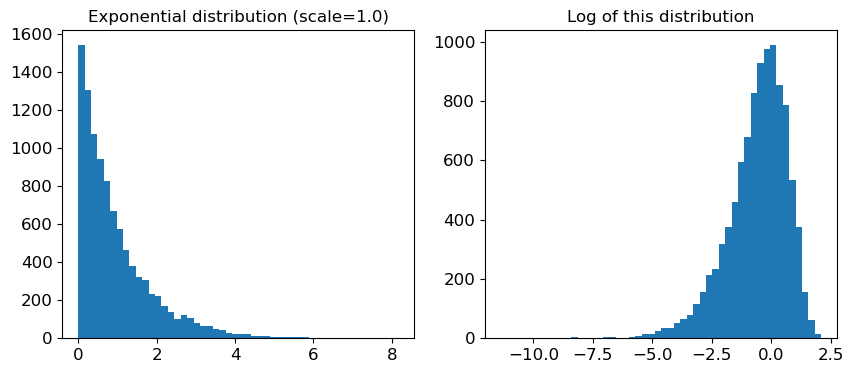

In [492]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

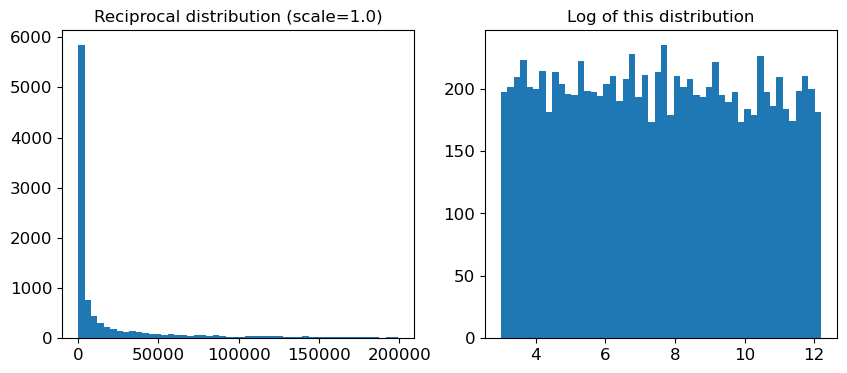

In [494]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()


## Question 3
#### Try adding a transformer in the preparation pipeline to select only the most important attributes

In [497]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [504]:
k = 5

In [506]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [508]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [510]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.37431273471991294, 'median_income'),
 (0.14555049361080732, 'INLAND'),
 (0.11471949225059393, 'pop_per_hhold'),
 (0.07026089130529828, 'longitude'),
 (0.06745529950214682, 'latitude')]

In [522]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [516]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [524]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

In [526]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

## Question 4
#### Try creating a single pipeline that does the full data preparation plus the final prediction

In [534]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [536]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(...
                 TopFeatureSelector(feature_importances=array([7.02608913e-02, 6.74552995e-02, 4.36004414e-02, 1.54331947e-02,
       1.46207773e-02, 1.51331356e-02, 1.40825002e-02, 3.74312735e-01,
       4.22077105e-02, 1.14719492e-01, 6.36822244e-02, 1.27789234e-02,
       1.45550494e-01, 7.71292712e-05, 2.33357114e-03, 3.75148070e-03]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=157055.10989448498, gamma=0.26497040005002437))])

In [538]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 83384.4917407  299407.90409275  92272.03334661 150173.16164089]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]
